# Logistic regression and polynomial logistic regression with and without regularization on moons and digits datasets

• Logistic regression using sklearn.linear_model.LogisticRegression<br>
• Polynomial logistic regression (multinomial logistic regression), setting hyperparameters multi_class = "multinomial" and solver = "lbfgs"<br>
• Variants with and without regularization for the given models<br>
• Posterior probabilities for the test case using the predict_proba method for each model<br>
<br>
Initial data:<br>
(a) sklearn.datasets.make_moons<br>
(b) sklearn.datasets.load_digits

In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_roc
from sklearn.model_selection import GridSearchCV
from mlxtend.plotting import plot_decision_regions

Data visualization functions

In [2]:
def show_moons(X, y):
    data = {'x': X[:,0], 'y': X[:,1], 'label': y}
    moons = pd.DataFrame(data)
    sns.scatterplot(x=moons['x'], y=moons['y'], hue=moons['label'])
    plt.show()

def show_digits(X, y):
    sample = sorted(random.sample(range(len(X)), 50))
    fig, axs = plt.subplots(nrows=5, ncols=10, figsize=(8, 6), subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axs.flat):
        ax.imshow(X[sample[i]].reshape(8, 8), cmap=plt.cm.gray)
        ax.set_title(y[sample[i]])
    plt.show()

Loading moons data

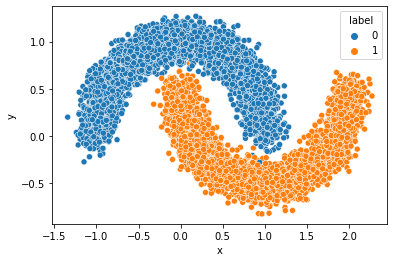

In [3]:
X_moons, y_moons = make_moons(n_samples=10000, noise=0.1)
show_moons(X_moons, y_moons)

Loading digits data

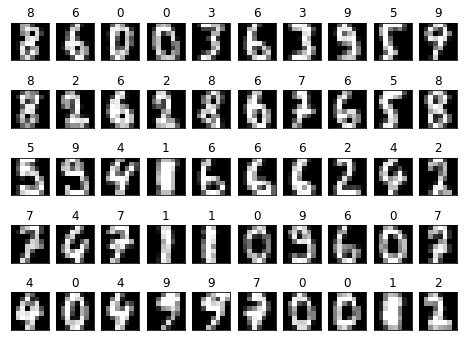

In [4]:
digits = load_digits()
X_digits = digits.data
y_digits = digits.target
show_digits(X_digits, y_digits)

Splitting data into training and test sets

In [5]:
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons, y_moons, test_size=0.1)
X_digits_train, X_digits_test, y_digits_train, y_digits_test = train_test_split(X_digits, y_digits, test_size=0.25)

Creation of logistic regression models for moons and their training

In [6]:
moons_simple_lr = LogisticRegression(penalty='none').fit(X_moons_train, y_moons_train)
moons_simple_lr_regularized = LogisticRegression().fit(X_moons_train, y_moons_train)
moons_multinomial_lr = LogisticRegression(penalty='none', multi_class='multinomial').fit(X_moons_train, y_moons_train)
moons_multinomial_lr_regularized = LogisticRegression(multi_class='multinomial').fit(X_moons_train, y_moons_train)

Validation of the trained model on test data

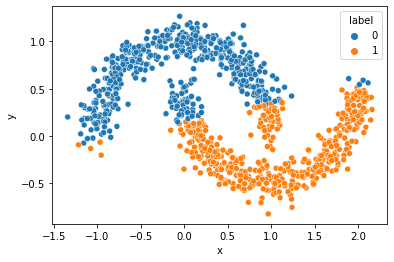

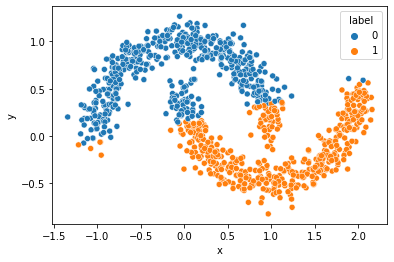

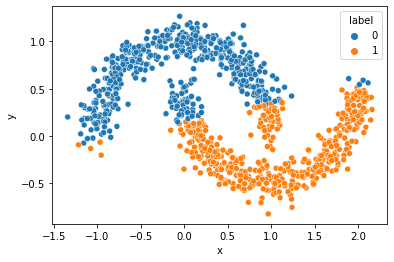

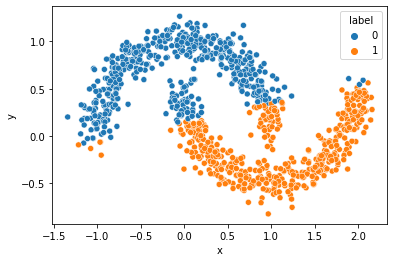

simple logistic regression score: 0.885
simple logistic regression regularized score: 0.887
multinomial logistic regression score: 0.885
multinomial logistic regression regularized score: 0.886


In [7]:
moons_pr1 = moons_simple_lr.predict(X_moons_test)
moons_pr2 = moons_simple_lr_regularized.predict(X_moons_test)
moons_pr3 = moons_multinomial_lr.predict(X_moons_test)
moons_pr4 = moons_multinomial_lr_regularized.predict(X_moons_test)

show_moons(X_moons_test, moons_pr1)
show_moons(X_moons_test, moons_pr2)
show_moons(X_moons_test, moons_pr3)
show_moons(X_moons_test, moons_pr4)

print('simple logistic regression score:', moons_simple_lr.score(X_moons_test, y_moons_test))
print('simple logistic regression regularized score:', moons_simple_lr_regularized.score(X_moons_test, y_moons_test))
print('multinomial logistic regression score:', moons_multinomial_lr.score(X_moons_test, y_moons_test))
print('multinomial logistic regression regularized score:', moons_multinomial_lr_regularized.score(X_moons_test, y_moons_test))

Calculation of posterior probabilities for the test example

In [8]:
moons_posterior_probabilities = moons_simple_lr.predict_proba(X_moons_test)

print(X_moons_test[0])
print('posterior probabilities:')
print(0, moons_posterior_probabilities[0, 0])
print(1, moons_posterior_probabilities[0, 1])

[0.65344122 0.51761468]
posterior probabilities:
0 0.813087341905424
1 0.18691265809457605


Decision regions for moons

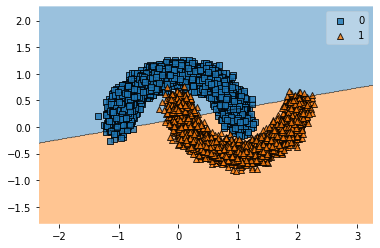

In [9]:
plot_decision_regions(X_moons, y_moons, moons_simple_lr)
plt.show()

Confusion matrix, precision, recall, F1 score, precision-recall curve, ROC curve, AUC score

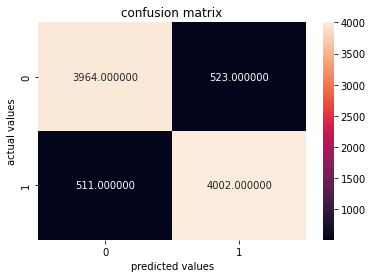

precision score: 0.8844198895027624
recall score: 0.8867715488588522
F1 score: 0.8855941579995574


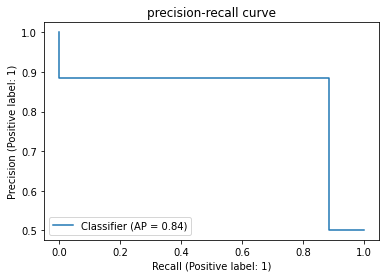

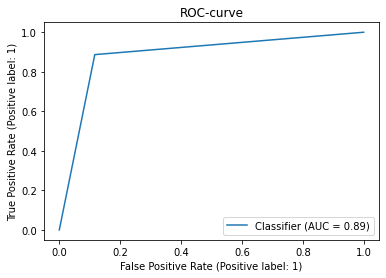

AUC score: 0.8851063003933218


In [10]:
moons_simple_lr_predict = moons_simple_lr.predict(X_moons_train)
sns.heatmap(confusion_matrix(y_moons_train, moons_simple_lr_predict), annot=True, fmt='f')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('confusion matrix')
plt.show()
print('precision score:', precision_score(y_moons_train, moons_simple_lr_predict))
print('recall score:', recall_score(y_moons_train, moons_simple_lr_predict))
print('F1 score:', f1_score(y_moons_train, moons_simple_lr_predict))
pr_curve_moons = PrecisionRecallDisplay.from_predictions(y_moons_train, moons_simple_lr_predict)
pr_curve_moons.ax_.set_title('precision-recall curve')
roc_curve_moons = RocCurveDisplay.from_predictions(y_moons_train, moons_simple_lr_predict)
roc_curve_moons.ax_.set_title('ROC-curve')
plt.show()
print('AUC score:', roc_auc_score(y_moons_train, moons_simple_lr_predict))

Grid search for selecting model hyperparameters

In [11]:
grid_values_moons = [{'penalty': ['l1', 'l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['liblinear', 'saga']},
               {'penalty': ['l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['newton-cg', 'lbfgs', 'sag']}]
grid_search_moons = GridSearchCV(LogisticRegression(), grid_values_moons, cv=5, n_jobs=-1)
grid_search_moons.fit(X_moons_train, y_moons_train)
print("best model for moons:")
print(grid_search_moons.best_params_)

best model for moons:
{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


Creation of logistic regression models for digits and their training

In [12]:
digits_simple_lr = LogisticRegression(penalty='none').fit(X_digits_train, y_digits_train)
digits_simple_lr_regularized = LogisticRegression(max_iter=10000).fit(X_digits_train, y_digits_train)
digits_multinomial_lr = LogisticRegression(penalty='none', multi_class='multinomial').fit(X_digits_train, y_digits_train)
digits_multinomial_lr_regularized = LogisticRegression(multi_class='multinomial', max_iter=10000).fit(X_digits_train, y_digits_train)

Validation of the trained model on test data

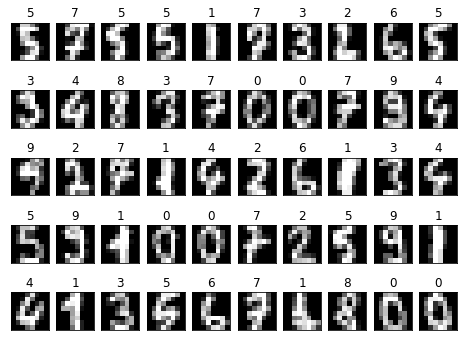

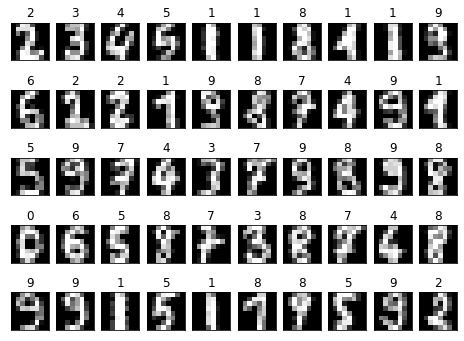

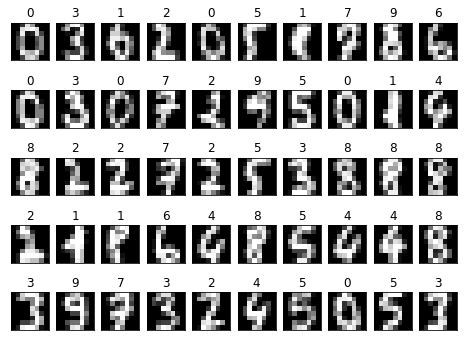

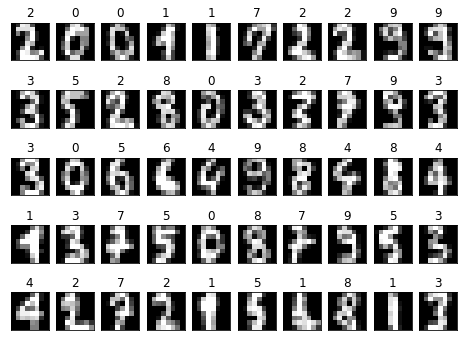

simple logistic regression score: 0.9511111111111111
simple logistic regression regularized score: 0.9711111111111111
multinomial logistic regression score: 0.9511111111111111
multinomial logistic regression regularized score: 0.9711111111111111


In [13]:
digits_pr1 = digits_simple_lr.predict(X_digits_test)
digits_pr2 = digits_simple_lr_regularized.predict(X_digits_test)
digits_pr3 = digits_multinomial_lr.predict(X_digits_test)
digits_pr4 = digits_multinomial_lr_regularized.predict(X_digits_test)

show_digits(X_digits_test, digits_pr1)
show_digits(X_digits_test, digits_pr2)
show_digits(X_digits_test, digits_pr3)
show_digits(X_digits_test, digits_pr4)

print('simple logistic regression score:', digits_simple_lr.score(X_digits_test, y_digits_test))
print('simple logistic regression regularized score:', digits_simple_lr_regularized.score(X_digits_test, y_digits_test))
print('multinomial logistic regression score:', digits_multinomial_lr.score(X_digits_test, y_digits_test))
print('multinomial logistic regression regularized score:', digits_multinomial_lr_regularized.score(X_digits_test, y_digits_test))

Calculation of posterior probabilities for the test example

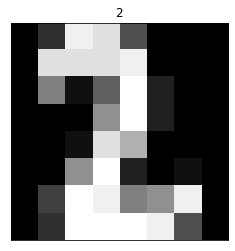

posterior probabilities:
0 1.4215434141905097e-181
1 2.5173441854042394e-94
2 1.0
3 3.5874883327687036e-65
4 1.7967857933733407e-154
5 1.297243026907233e-132
6 1.39198377327189e-118
7 5.56444431507829e-113
8 8.875024358597095e-105
9 1.275318799303121e-125


In [14]:
digits_posterior_probabilities = digits_simple_lr.predict_proba(X_digits_test)

fig, ax = plt.subplots(subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(X_digits_test[0].reshape(8, 8), cmap=plt.cm.gray)
ax.set_title(y_digits_test[0])
plt.show()
print('posterior probabilities:')
for i in range(10):
    print(i, digits_posterior_probabilities[0, i])

Confusion matrix, precision, recall, F1 score, precision-recall curve, ROC curve, AUC score

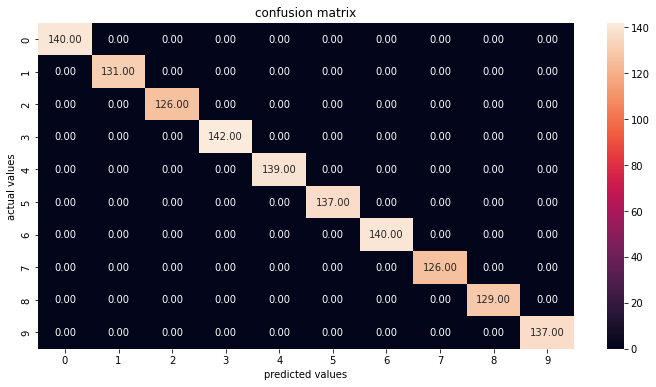

precision score: 1.0
recall score: 1.0
F1 score: 1.0


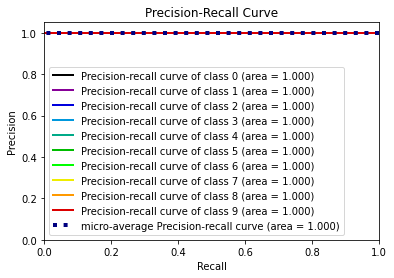

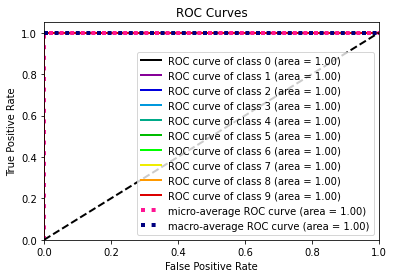

In [15]:
digits_simple_lr_predict = digits_simple_lr.predict(X_digits_train)
plt.figure(figsize=(12, 6))
sns.heatmap(confusion_matrix(y_digits_train, digits_simple_lr_predict), annot=True, fmt='.2f')
plt.xlabel('predicted values')
plt.ylabel('actual values')
plt.title('confusion matrix')
plt.show()
print('precision score:', precision_score(y_digits_train, digits_simple_lr_predict, average='micro'))
print('recall score:', recall_score(y_digits_train, digits_simple_lr_predict, average='micro'))
print('F1 score:', f1_score(y_digits_train, digits_simple_lr_predict, average='micro'))

digits_simple_lr_predict_proba = digits_simple_lr.predict_proba(X_digits_train)
plot_precision_recall(y_digits_train, digits_simple_lr_predict_proba)
plt.show()
plot_roc(y_digits_train, digits_simple_lr_predict_proba)
plt.show()

Grid search for selecting model hyperparameters

In [19]:
grid_values_digits = [{'penalty': ['l1', 'l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['liblinear', 'saga']},
                      {'penalty': ['l2'], 'C': np.logspace(-3, 3, 7), 'solver': ['newton-cg', 'lbfgs', 'sag']}]
grid_search_digits = GridSearchCV(LogisticRegression(max_iter=1000), grid_values_digits, cv=4, n_jobs=-1)
grid_search_digits.fit(X_digits_train[:100], y_digits_train[:100])
print('best model for digits:')
print(grid_search_digits.best_params_)

best model for digits:
{'C': 100.0, 'penalty': 'l2', 'solver': 'lbfgs'}
